In [1]:
!pip install FER

  Using cached fer-22.5.1-py3-none-any.whl (1.5 MB)
  Using cached facenet_pytorch-2.5.3-py3-none-any.whl (1.9 MB)
  Using cached moviepy-1.0.3.tar.gz (388 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached opencv_contrib_python-4.7.0.72-cp37-abi3-win_amd64.whl (44.9 MB)
  Using cached ffmpeg-1.4.tar.gz (5.1 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached torchvision-0.15.2-cp310-cp310-win_amd64.whl (1.2 MB)
  Using cached decorator-4.4.2-py2.py3-none-any.whl (9.2 kB)
  Using cached proglog-0.1.10-py3-none-any.whl (6.1 kB)
     -------------------------------------- 22.6/22.6 MB 382.2 kB/s eta 0:00:00
     ------------------------------------ 172.3/172.3 MB 517.9 kB/s eta 0:00:00
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6089 sha256=ec7ebc67284a8b46214b143be62fe7904a06e53e64913451eaed9625b940e577
  Stored in directory

In [6]:
from fer import Video
from fer import FER
import os
import sys
import pandas as pd
location_videofile = "videos/stacy.mp4"

In [7]:
face_detector = FER(mtcnn=True)

In [8]:
input_video = Video(location_videofile)

In [9]:
processing_data = input_video.analyze(face_detector, display=False)

INFO:fer:30.02 fps, 269 frames, 8.96 seconds
INFO:fer:Making directories at output
100%|████████████████████████████████████████████████████████████████████████████| 269/269 [00:55<00:00,  4.86frames/s]
INFO:fer:Completed analysis: saved to output\stacy_output.mp4
INFO:fer:Starting to Zip
INFO:fer:Compressing: 18%
INFO:fer:Compressing: 37%
INFO:fer:Compressing: 55%
INFO:fer:Compressing: 74%
INFO:fer:Compressing: 92%
INFO:fer:Zip has finished


In [10]:
vid_df = input_video.to_pandas(processing_data)

In [11]:
vid_df = input_video.get_first_face(vid_df)

In [12]:
vid_df = input_video.get_emotions(vid_df)

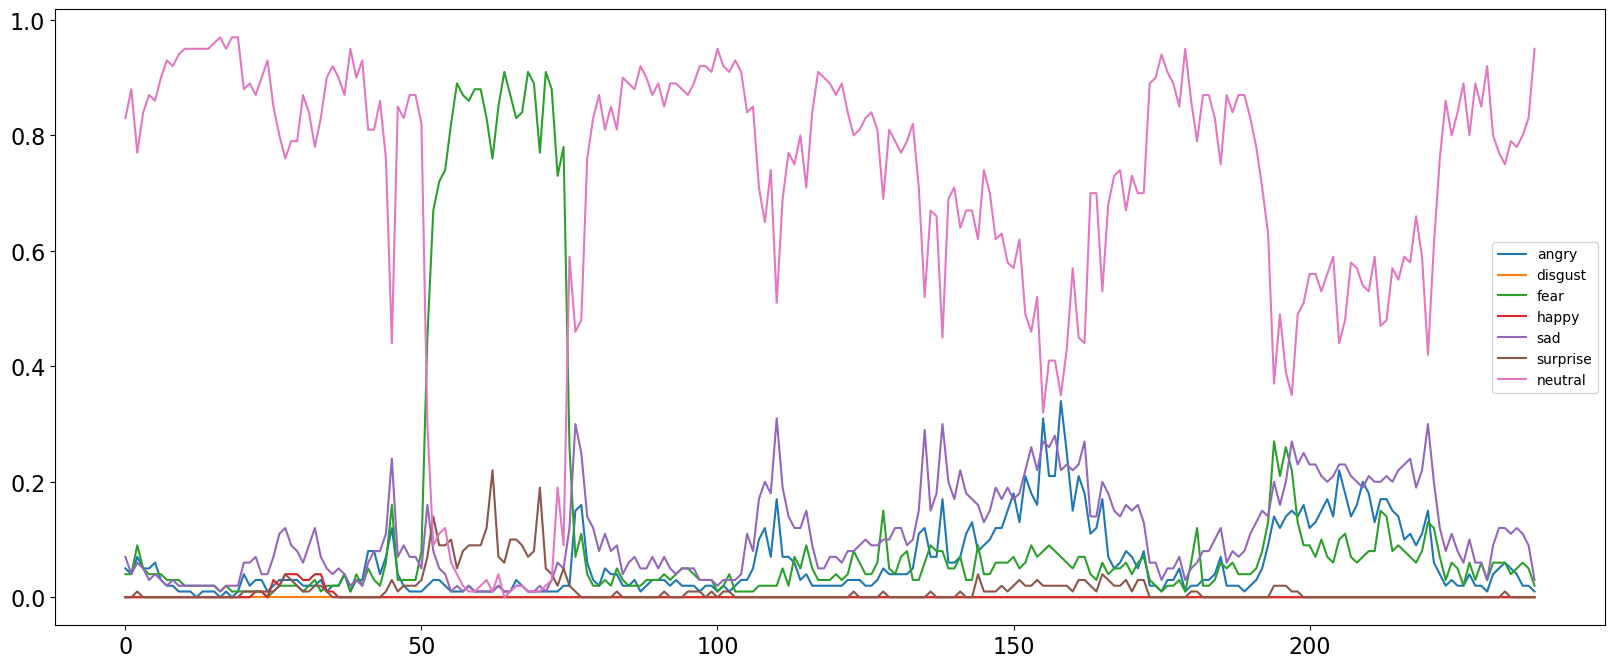

In [13]:
pltfig = vid_df.plot(figsize=(20, 8), fontsize=16).get_figure()

In [14]:
angry = sum(vid_df.angry)

In [15]:
disgust = sum(vid_df.disgust)

In [16]:
fear = sum(vid_df.fear)

In [17]:
happy = sum(vid_df.happy)

In [18]:
sad = sum(vid_df.sad)

In [19]:
surprise = sum(vid_df.surprise)

In [20]:
neutral = sum(vid_df.neutral)

In [21]:
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

In [22]:
emotions_values = [angry, disgust, fear, happy, sad, surprise, neutral]

In [23]:
score_comparisons = pd.DataFrame(emotions, columns = ['Human Emotions'])

In [24]:
score_comparisons['Emotion Value from the Video'] = emotions_values

In [25]:
score_comparisons

,Human Emotions,Emotion Value from the Video
0,Angry,14.57
1,Disgust,0.00
2,Fear,30.81
3,Happy,0.35
4,Sad,25.88
5,Surprise,3.43
6,Neutral,163.55


In [26]:
from moviepy.editor import *

In [28]:
path="videos/stacy.mp4"

In [29]:
clip=VideoFileClip(path)

In [41]:
clip.write_videofile('video.mp4', fps=30)

Moviepy - Building video video.mp4.
MoviePy - Writing audio in videoTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video video.mp4



TypeError: must be real number, not NoneType